## Phase 2 - Flatiron Data Science 
Project focused on Inferential Analysis: Heart Disease (Dataset from UCI)

By Rashmi Chauhan

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("HeartDiseaseTrain-Test.csv")

In [8]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [16]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia', 'target'],
      dtype='object')

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
resting_blood_pressure,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
cholestoral,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
Max_heart_rate,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2
target,1025.0,0.513171,0.500070,0.0,0.0,1.0,1.0,1.0


In [44]:
# Convert columns to numeric, forcing errors to NaN
df['resting_blood_pressure'] = pd.to_numeric(df['resting_blood_pressure'], errors='coerce')
df['cholestoral'] = pd.to_numeric(df['cholestoral'], errors='coerce')
df['fasting_blood_sugar'] = pd.to_numeric(df['fasting_blood_sugar'], errors='coerce')
df['Max_heart_rate'] = pd.to_numeric(df['Max_heart_rate'], errors='coerce')
df['oldpeak'] = pd.to_numeric(df['oldpeak'], errors='coerce')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            0 non-null      float64
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

My data:
2 types of sex (male or female)
4 types of chest pain
2 types of fasting_blood_sugar(less than or greater than)
3 types of rest_ecg
4 types of thalassemia
5 types of colored by flourosopy
3 types of slope
2 types of induced angina(yes or no)

In [ ]:
since most of the data is categorical i chose to visualize using countplot

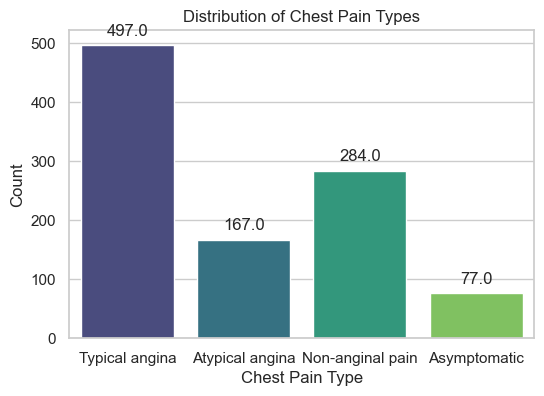

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'chest_pain_type' is a column in it
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")
bar_plot = sns.countplot(x='chest_pain_type', data=df, palette='viridis')

# Adding annotations
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

In [ ]:
How does age affect the risk of experiencing a heart attack?

<Figure size 1000x600 with 0 Axes>

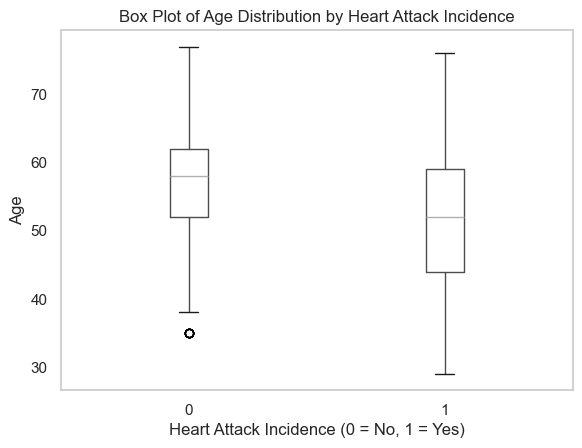

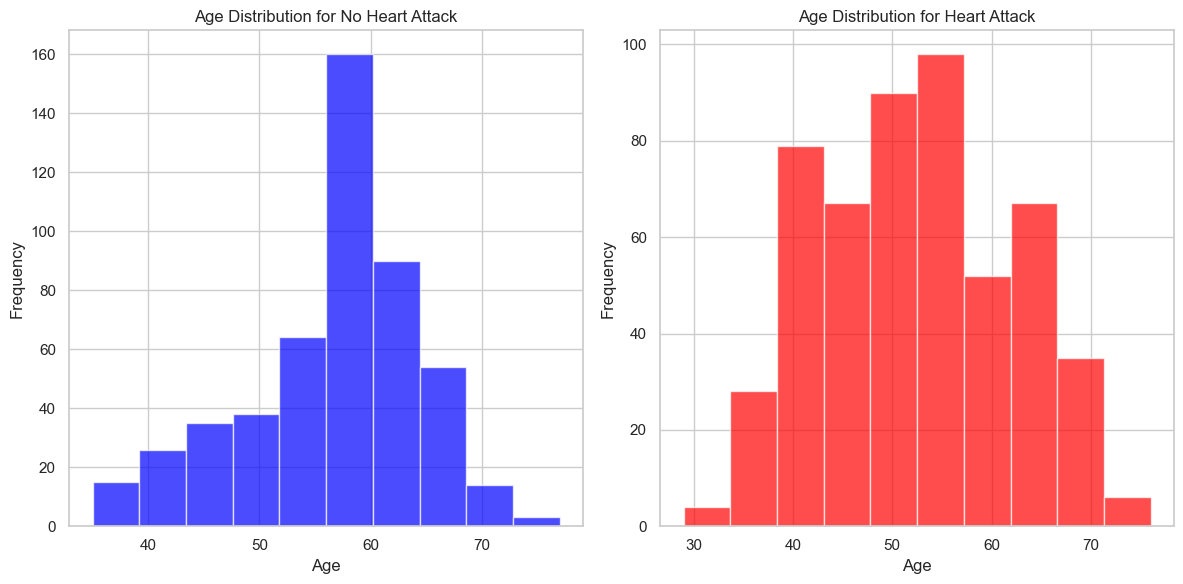

In [18]:
# Box plots for Age distribution in both groups (Heart Attack Incidence: 0 and 1)
plt.figure(figsize=(10, 6))
df.boxplot(column='age', by='target', grid=False)
plt.title('Box Plot of Age Distribution by Heart Attack Incidence')
plt.suptitle('')  # Suppress the default title
plt.xlabel('Heart Attack Incidence (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

# Histograms for Age distribution in both groups (Heart Attack Incidence: 0 and 1)
plt.figure(figsize=(12, 6))

# Histogram for patients without a heart attack
plt.subplot(1, 2, 1)
plt.hist(df[df['target'] == 0]['age'], bins=10, alpha=0.7, color='blue')
plt.title('Age Distribution for No Heart Attack')
plt.xlabel('Age')
plt.ylabel('Frequency')
# Histogram for patients with a heart attack
plt.subplot(1, 2, 2)
plt.hist(df[df['target'] == 1]['age'], bins=10, alpha=0.7, color='red')
plt.title('Age Distribution for Heart Attack')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Inferential Analysis:

### Q1: Is there a significant difference in the mean age between patients who have had a heart attack and those who have not?"

In [30]:
# Example for age
age_no_heart_attack = df[df['target'] == 0]['age']
age_with_heart_attack = df[df['target'] == 1]['age']

t_stat, p_value = ttest_ind(age_no_heart_attack, age_with_heart_attack)
print(f'T-test for Age: t-statistic = {t_stat}, p-value = {p_value}')

T-test for Age: t-statistic = 7.535591207962243, p-value = 1.0677220241596988e-13


## Q2:Chi-Square Test
### To test for associations between categorical variables (e.g., sex and heart attack incidence):

In [34]:
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(df['sex'], df['target'])

# Perform chi-square test
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
print(f'Chi-Square Test for Sex: chi2-statistic = {chi2_stat}, p-value = {p_val}')

Chi-Square Test for Sex: chi2-statistic = 78.86305133922973, p-value = 6.656820681726434e-19


## Q3: ANOVA
### To compare means of a numerical variable (e.g., age) across different categories (e.g., chest pain types):

In [40]:
# Example for age and chest pain type
age_by_pain_type = [df[df['chest_pain_type'] == pain_type]['age'] for pain_type in df['chest_pain_type'].unique()]
f_stat, p_val = f_oneway(*age_by_pain_type)
print(f'ANOVA for Age by Chest Pain Type: F-statistic = {f_stat}, p-value = {p_val}')

ANOVA for Age by Chest Pain Type: F-statistic = 12.713293588650242, p-value = 3.672018484649832e-08
